## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [5]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sys
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


### Load the dataset

In [9]:
df = pd.read_csv('tips.csv')
# verify if the data has loaded correctly into dataframe
df.head()
#check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### 1. Make a list of categorical and numerical columns in the data.

In [46]:
category_cols = df.select_dtypes(include=['object']).columns.tolist()
print(category_cols)
numeric_cols = df.select_dtypes(include=['int','float']).columns.tolist()
print(numeric_cols)

['sex', 'smoker', 'day', 'time']
['total_bill', 'tip', 'size']


### 2. Compute the average bill amount for each day.

In [28]:
print("AVERAGE TIPS PER DAY")
print(df.groupby('day')['total_bill'].mean() )

AVERAGE TIPS PER DAY
day
Fri      325.88
Sat     1778.40
Sun     1627.16
Thur    1096.33
Name: total_bill, dtype: float64


### 3. Which gender is more generous in giving tips?

In [31]:
df.groupby('sex')['tip'].mean()


sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

### 4. According to the data, were there more customers for dinner or lunch?

In [33]:
df.groupby('time')['size'].sum()

time
Dinner    463
Lunch     164
Name: size, dtype: int64

### 5. Based on the statistical summary, comment on the variable 'tip'

In [47]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [ ]:
#A total of 244 tips were recived and on AVERAGE tip is close to $3. 
#The tips RANGE is between $1 to $10. 
#Also we see that there are no $0 tips hence every customer has paid a tip.

### 6. Find the busiest day in terms of the orders?

In [40]:
df.groupby('day')['size'].sum()


day
Fri      40
Sat     219
Sun     216
Thur    152
Name: size, dtype: int64

In [41]:
#Based on total number of customers per day we see that Saturday was busiest as 
df.groupby('day')['size'].sum().idxmax()

'Sat'

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

<Axes: xlabel='total_bill', ylabel='Density'>

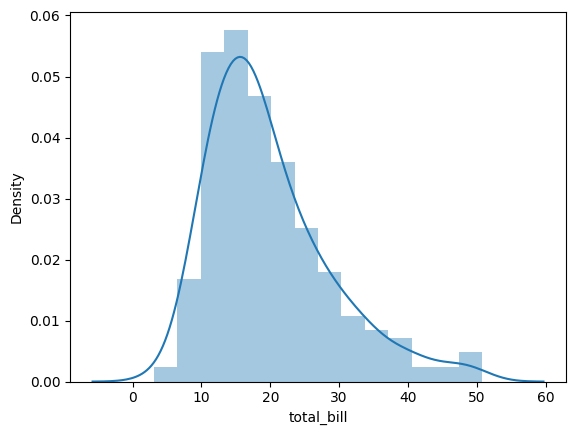

In [54]:
sns.distplot(df['total_bill'])
# The graph shown below is right skewed or positive skewed

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [62]:
#As total bill increases should show increase in tip as well
 
print('There is direct co-relation ',df[['tip','total_bill']].corr())



There is direct co-relation                   tip  total_bill
tip         1.000000    0.674998
total_bill  0.674998    1.000000


In [ ]:
#We notice there is POSITIVE CORRELATION, as bill increases the tip increaes as well.

### 9. What is the percentage of males and females in the dataset? and display it in the plot

<Axes: ylabel='proportion'>

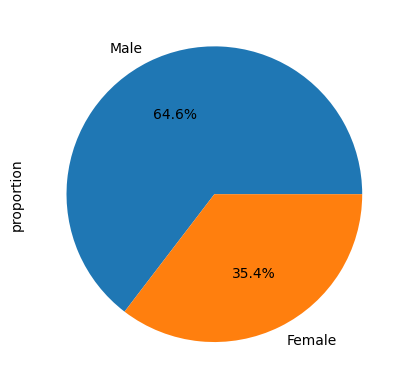

In [66]:
#PIE CHART can be used to show the % of make female ratio
df['sex'].value_counts(normalize=True).plot(kind='pie',autopct='%.1f%%' )

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [67]:
df.groupby('sex')['smoker'].value_counts()

sex     smoker
Female  No        54
        Yes       32
Male    No        97
        Yes       60
Name: count, dtype: int64

In [68]:
pd.crosstab(df['smoker'], df['sex'])


sex,Female,Male
smoker,,
No,54,97
Yes,32,60


<Axes: xlabel='smoker'>

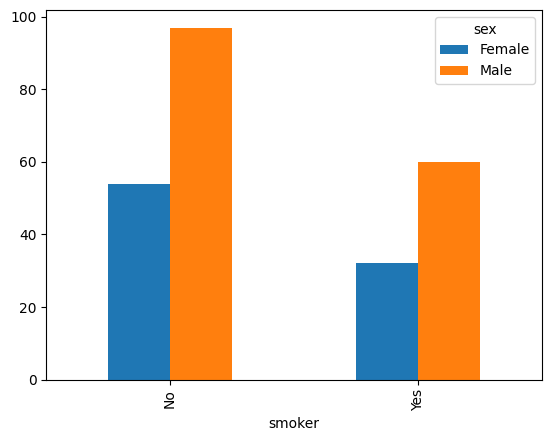

In [70]:
pd.crosstab(df['smoker'], df['sex']).plot(kind='bar')

### 11. Compute the average tip amount given for different days and display it in the plot.

In [72]:
#first group the data by day and then take the sum of all the tips
df.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.784098
Name: tip, dtype: float64

<Axes: xlabel='day', ylabel='tip'>

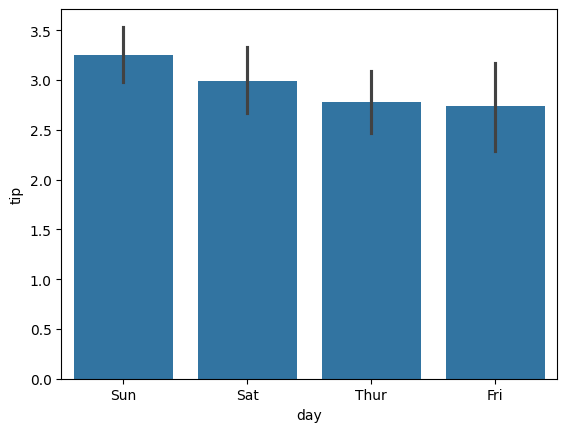

In [74]:
sns.barplot(x='day', y='tip', data=df)

<Axes: xlabel='day'>

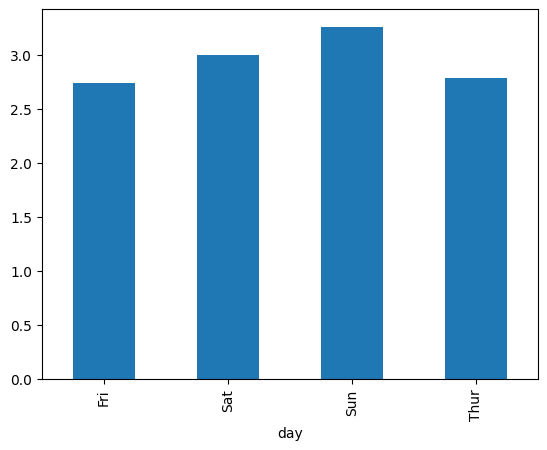

In [75]:
df.groupby('day')['tip'].mean().plot(kind='bar')

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

<Axes: xlabel='size'>

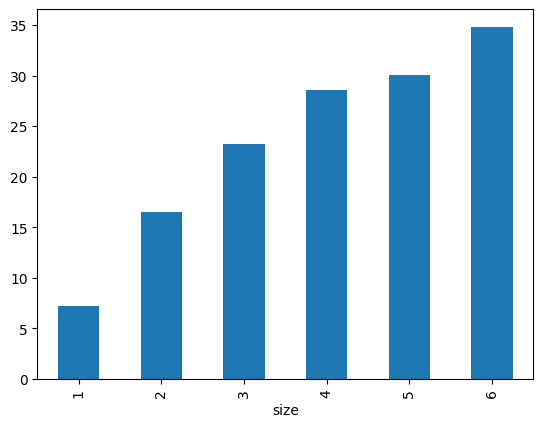

In [78]:
# We can see that bill increase as the size of group increases, 
#which is obvious as more food will be consumed
df.groupby('size')['total_bill'].mean().plot(kind='bar')

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

<Axes: xlabel='total_bill', ylabel='sex'>

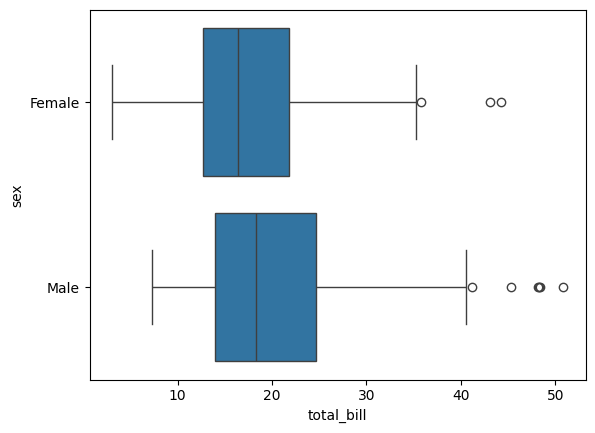

In [79]:
sns.boxplot(x='total_bill', y='sex', data = df)

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [80]:
# let us find the total of dinner / lunch totals on all days
df.groupby(['time','day'])['total_bill'].max()
# please note there is no lunch data on Sat/Sunday

time    day 
Dinner  Fri     40.17
        Sat     50.81
        Sun     48.17
        Thur    18.78
Lunch   Fri     16.27
        Thur    43.11
Name: total_bill, dtype: float64

In [10]:
sat_dinner = df[((df['day']=='Sat') & (df['time']=='Dinner'))]
print(sat_dinner['total_bill'].max())

50.81


In [11]:
sun_dinner = df[((df['day']=='Sun') & (df['time']=='Dinner'))]
print(sun_dinner['total_bill'].max())

48.17


### 15. Compute the percentage of missing values in the dataset.

In [82]:
df.isnull().sum()/len(df)*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [85]:
len(df[df.duplicated()])

1

In [58]:
df.drop_duplicates(inplace=True)

In [59]:
# this should output 0 as all duplicates are dropped now
len(df[df.duplicated()])

0

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

<Axes: ylabel='total_bill'>

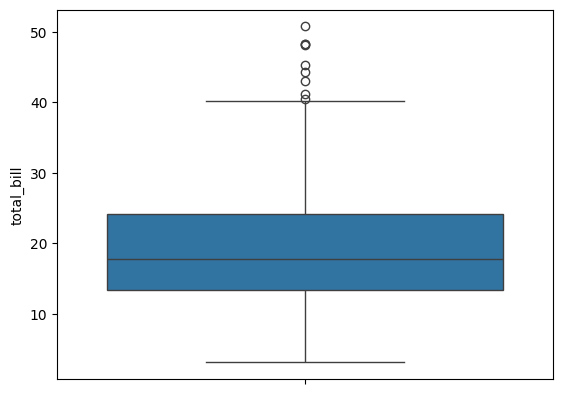

In [91]:
#as shown below we can see a number of outliers in the total_bill
sns.boxplot(df['total_bill'])

<Axes: ylabel='total_bill_wo_outliers'>

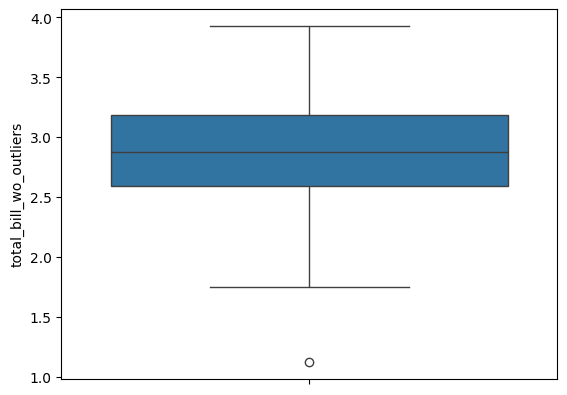

In [88]:
#let us take log and rmeove the outliers and save in a new place
df['total_bill_wo_outliers'] = np.log(df['total_bill'])
sns.boxplot(df['total_bill_wo_outliers'])

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

<Axes: ylabel='tip'>

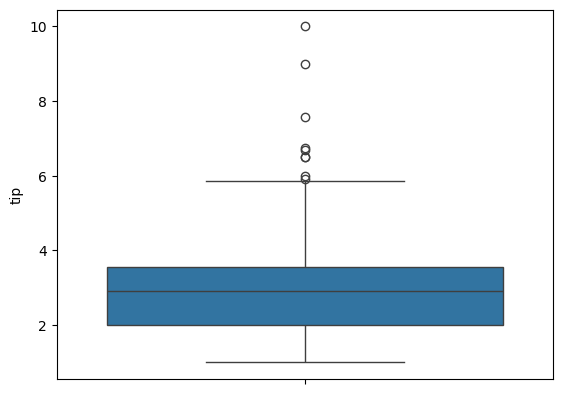

In [90]:
#as shown below we can see a number of outliers in the tip
sns.boxplot(df['tip'])

In [95]:
q1 = df['tip'].quantile(0.25)
q3 = df['tip'].quantile(0.75)
iqr = q3 - q1

lower_whisker = q1 - (1.5*iqr)
upper_whisker = q3 + (1.5*iqr)

In [97]:
df_out = df.loc[(df['tip'] < upper_whisker) & (df['tip'] > lower_whisker) ]

<Axes: ylabel='tip'>

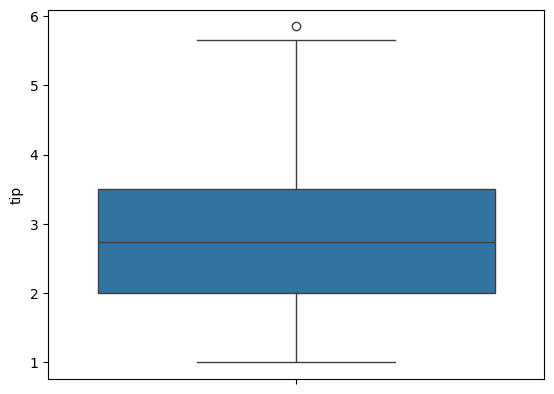

In [99]:
sns.boxplot(df_out['tip'])

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe

In [102]:
df_cat = pd.get_dummies(df, drop_first=True)
df_cat.sample(5)

,total_bill,tip,size,total_bill_wo_outliers,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
219,30.14,3.09,4,3.405853,False,True,True,False,False,False
180,34.65,3.68,4,3.545298,True,True,False,True,False,False
102,44.30,2.50,3,3.790985,False,True,True,False,False,False
176,17.89,2.00,2,2.884242,True,True,False,True,False,False
172,7.25,5.15,2,1.981001,True,True,False,True,False,False


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [105]:
print("Range of the bill is :")
df['total_bill'].max() - df['total_bill'].min() 

Range of the bill is :


47.74

In [109]:
minmaxscaler = MinMaxScaler()
df['total_bill_mms'] = minmaxscaler.fit_transform(df[['total_bill']])

print("Range of the bill is :")
df['total_bill_mms'].max() - df['total_bill_mms'].min() 

Range of the bill is :


0.9999999999999999

### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [111]:
tips_df = pd.read_csv('tips.csv')

In [113]:
tips_df = pd.get_dummies(tips_df, drop_first=True)
tips_df.head(2)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False


In [114]:
X  = tips_df.drop('tip', axis=1)
y = tips_df['tip']

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [142]:
#split 70-30 for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [143]:
mm = MinMaxScaler()

X_train.iloc[:,:2] = mm.fit_transform(X_train.iloc[:,:2])
X_test.iloc[:,:2]  = mm.fit_transform(X_test.iloc[:,:2])

X_train.iloc[:,:2].sample(5)

,total_bill,size
199,0.218685,0.2
163,0.224969,0.2
13,0.321743,0.6
158,0.216171,0.2
149,0.093004,0.2


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [144]:
linear_reggr  = LinearRegression()
linear_reggr.fit(X_train,y_train)


LinearRegression()

In [145]:
predictor = linear_reggr.predict(X_test)

In [146]:
print("my r squared value is ")
print(r2_score(y_test,predictor))

my r squared value is 
0.40050401856150253


### Happy Learning:)